In [3]:

from keras.layers import Input
from keras.optimizers import Adam
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import json
import tensorflow as tf
import os


from model import UNet
from DataGen import DataGen

%load_ext autoreload
%autoreload 2

#from google.colab import drive
#drive.mount('/content/drive')

from predict import predict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
train_path = "./uavid_train/*/Images/"
train_label_path= "./onechanneltrain/"
val_path = "./uavid_val/*/Images/"
val_label_path= "./onechannelval/"
IMAGE_SIZE=128
BATCH_SIZE=6
EPOCHS=70

loaded_model_path=f"./model-{IMAGE_SIZE}.h5"


In [5]:
model = UNet(IMAGE_SIZE)
train_gen = DataGen(train_path, train_label_path, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE)
valid_gen = DataGen(val_path, val_label_path, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE)
callback=tf.keras.callbacks.ModelCheckpoint(
    "./model-128.h5",
    monitor= 'val_loss',
    verbose= 1,
    save_freq='epoch')
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["acc"])

In [ ]:
history=model.fit(train_gen, validation_data=valid_gen, 
                steps_per_epoch=train_gen.steps, validation_steps=valid_gen.steps, 
                callbacks=[callback],epochs=EPOCHS)

with open('file.json', 'w') as f:
    json.dump(history.history, f)

In [ ]:
model.save("model-128-70.h5")

history_dict = json.load(open("file.json", 'r'))
plt.plot(history_dict['val_loss'], label = "val_loss")
plt.plot(history_dict['loss'], label = "loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
plt.plot(history_dict['val_acc'], label = "val_acc")
plt.plot(history_dict['acc'], label = "acc")
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [6]:
loaded_model=load_model(loaded_model_path)

1/1 [==============================] - 0s 47ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


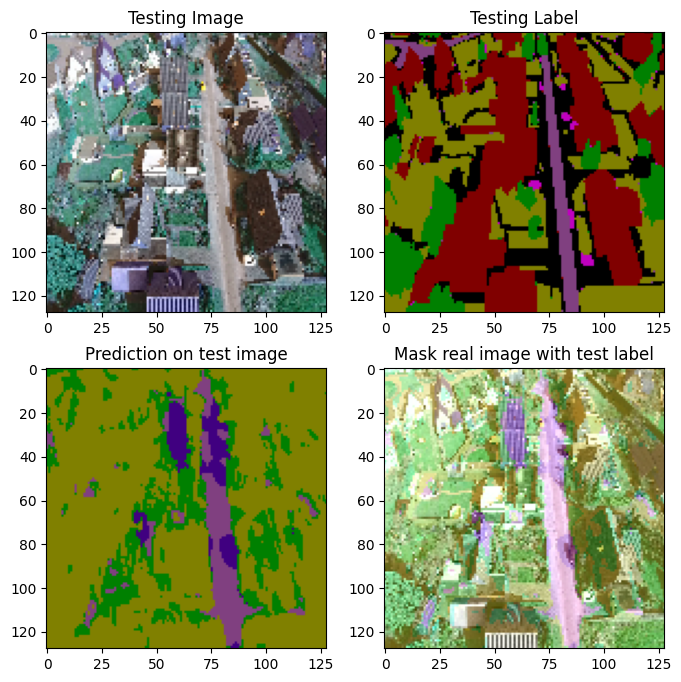

In [11]:
predict(valid_gen,loaded_model,image_size=IMAGE_SIZE)